In [12]:
# Definindo a paleta de cores
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5, AZUL6 = '#174A7E', '#4A81BF', "#6495ED", '#2596BE', '#94AFC5', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5, BRANCO = '#231F20', '#414040', '#555655', '#A6A6A5', '#BFBEBE', '#FFFFFF'
VERMELHO1, VERMELHO2, LARANJA1 = '#C3514E',	'#E6BAB7',	'#F79747'
VERDE1, VERDE2, VERDE3 = '#0C8040',	'#9ABB59', '#9ECCB3'

NameError: name 'df_agro_slope' is not defined

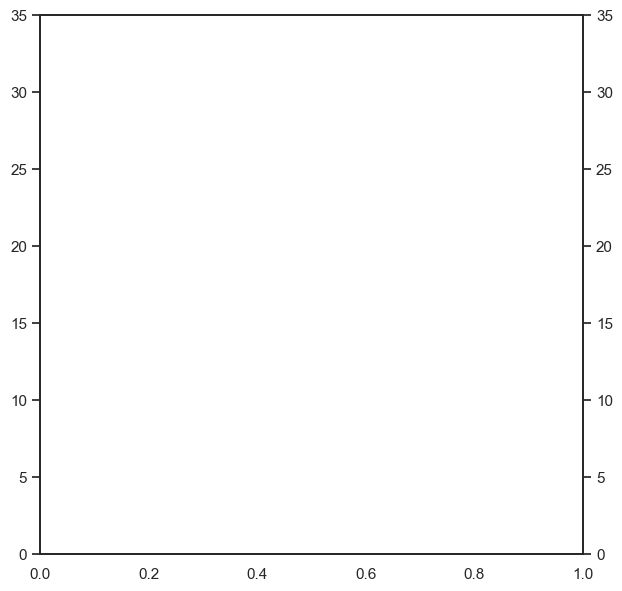

In [13]:
# Importando as bibliotecas
import matplotlib.pyplot as plt

# Área do gráfico e tema da visualização
fig, ax1 = plt.subplots(figsize=(7,7))

# Definindo as cores do gráfico
cores = [VERDE3, VERMELHO2, AZUL3, LARANJA1, CINZA4]

# O seaborn possui uma função chamada pointplot() que pode gerar um gráfico deste tipo
# mas para termos liberdade na criação do nosso gráfico vamos optar por contruí-lo
# por meio do matplotlib usando axis duplos partilhando o eixo x e os mesmos limites em y
ax2 = ax1.twinx()
ax1.set_ylim([0,35])
ax2.set_ylim([0,35])

# Gerando o gráfico de inclinação (pontos + curva + texto)
for i in range(5):
	# Adicionando o ponto inicial e final
	ax1.scatter(x = df_agro_slope.index, y = df_agro_slope.iloc[:,i], color = cores[i], s = 50)

	# Adicionando a inclinação
	ax1.plot(df_agro_slope.index, df_agro_slope.iloc[:,i], color = cores[i], lw = 3)

	# Adicionando as regiões no label
	ax1.text(x = 2024, y = df_agro_slope.iloc[-1,i], s = df_agro_slope.columns[i],
			 fontsize=15, fontweight = 'bold', linespacing=1.5, color=cores[i], va='center')

# Personalizando o gráfico
ax1.set_title('PIB relativo à agropecuária nas regiões do Brasil', fontsize = 18, color = CINZA1, loc='left', pad = 40)
ax1.text(0, 1.05, "Comparação entre os anos de 2002 e 2020 (%)", transform=ax1.transAxes, color= CINZA3, fontsize=12, ha='left', va='center')

# Configurando o gráfico com parâmetros que potencializam a visualização dos dados

# Retirando os ticks do eixo y de ambos os lados e as bordas exceto a da base
ax1.tick_params(left = False)
ax1.spines[["top", "left", "right"]].set_visible(False)
ax2.tick_params(right = False)
ax2.set_frame_on(False)

# Ajustando as propriedades do eixo y da esquerda
plt.setp(ax1, xticks=[2002, 2020], xticklabels = ["2002", "2020"],
		 yticks = df_agro_slope.iloc[0,:],
		 yticklabels = [f'{str(valor)}%' if i!= 3 else f'{str(valor)}%\n\n' for i, valor in enumerate(df_agro_slope.iloc[0,:])]
		 )

# Ajustando as propriedades do eixo y da direita
plt.setp(ax2, yticks = df_agro_slope.iloc[1,:],
		 yticklabels = [f'{str(valor)}%' for i, valor in enumerate(df_agro_slope.iloc[1,:])])

# Ajustando propriedades dos dois eixos y
for ax in (ax1, ax2):
	for i, item in enumerate(ax.get_yticklabels()):
		item.set_fontsize(14)
		item.set_fontweight('bold')
		item.set_color(cores[i])

# Ajustando propriedades do eixo x
ax1.xaxis.set_tick_params(labelsize=14, labelcolor=CINZA3)
ax1.spines['bottom'].set_color(CINZA3)

plt.show()